In [45]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error

## Importance des Temps de Fonctionnement dans l'Analyse Fiabiliste

Dans l'analyse fiabiliste des systèmes, **seuls les temps de fonctionnement de l’équipement sont nécessaires** pour réaliser une étude statistique. Ces temps représentent la durée pendant laquelle un équipement fonctionne correctement avant de subir une défaillance. 

### Pourquoi se concentrer sur les temps de fonctionnement ?
1. **Simplicité des données requises :**
   - Contrairement à d'autres méthodes, l'analyse statistique basée sur les temps de fonctionnement ne nécessite pas de connaître les conditions environnementales, les charges appliquées ou d'autres paramètres complexes.
   
2. **Modélisation de la fiabilité :**
   - Les temps de fonctionnement permettent de calculer des indicateurs clés tels que la probabilité de survie, le taux de défaillance, et la durée de vie moyenne (MTTF).

3. **Application des lois statistiques :**
   - À partir des données des temps de fonctionnement, il est possible d'ajuster des lois statistiques adaptées (exponentielle, Weibull, normale, etc.) pour modéliser le comportement de défaillance et prédire la fiabilité.

4. **Prédiction du RUL :**
   - Ces informations servent également de base pour estimer la durée de vie restante utile (RUL), en identifiant les patterns de dégradation et les probabilités de panne.



#### Chargement et Prétraitement des Données FD001

In [46]:
# Chemin du fichier contenant les données du moteur FD001
data_path = r"..\data\train_FD001.txt"  

# Charger les données à partir du fichier texte
data_FD001 = pd.read_csv(data_path, sep=" ", header=None)

data_FD001

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [47]:
# les colonnes 26 et 27 sont vides 
data_FD001 = data_FD001.drop([26, 27], axis='columns')

column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2', 
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

# Attribuer les noms de colonnes au DataFrame
data_FD001.columns = column_names


#### Calcul du RUL (Remaining Useful Life)
RUL = max_time - current_time

In [48]:
data_FD001['rul'] = data_FD001.groupby('engine')['time'].transform('max') - data_FD001['time']

In [49]:
data_FD001

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


#### chargement des données de test

In [50]:
test_FD001 = pd.read_csv('../data/test_FD001.txt', delim_whitespace=True,names=column_names)
rul_true = pd.read_csv('../data/RUL_FD001.txt', delim_whitespace=True,names=["RUL"])

C:\Users\user\AppData\Local\Temp\ipykernel_29196\960586947.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_FD001 = pd.read_csv('../data/test_FD001.txt', delim_whitespace=True,names=column_names)
C:\Users\user\AppData\Local\Temp\ipykernel_29196\960586947.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_true = pd.read_csv('../data/RUL_FD001.txt', delim_whitespace=True,names=["RUL"])


#### Analyse des Temps de Défaillance des Moteurs

In [51]:
failure_time = data_FD001.groupby('engine')['rul'].max()


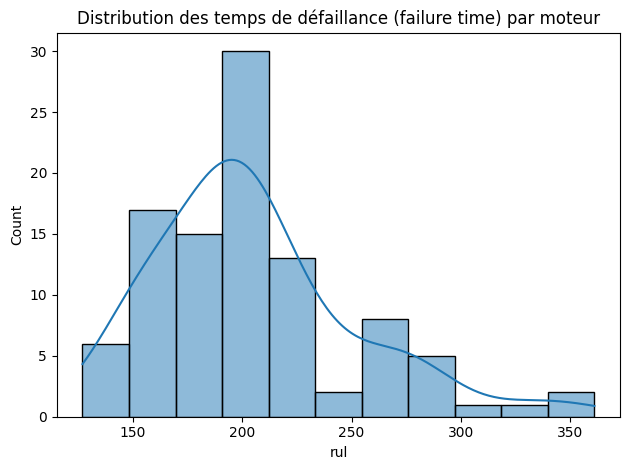

In [52]:
# Visualisation
sns.histplot(failure_time, kde=True)
plt.title('Distribution des temps de défaillance (failure time) par moteur')
plt.tight_layout()
plt.show()

#### Ajuster les lois statistiques et estimer les paramètres

À partir des données des temps de fonctionnement, il est possible d'ajuster des lois statistiques adaptées (exponentielle, Weibull, normale, etc.) pour modéliser le comportement de défaillance et prédire la fiabilité.

In [53]:
from scipy import stats
from scipy.stats import expon, weibull_min, norm, lognorm, gamma

# Ajustement des lois statistiques sur les données
distributions = {
    "Weibull": weibull_min,
    "Normal": norm,
    "Log-Normal": lognorm,
    "Gamma": gamma
}

# Stocker les résultats d'ajustement
fitted_params = {}
for name, dist in distributions.items():
    params = dist.fit(failure_time)
    fitted_params[name] = params
   


In [54]:
# Affichage des paramètres ajustés pour toutes les lois
print("Paramètres ajustés pour chaque loi :\n")
for name, params in fitted_params.items():
    if name == "Weibull":
        print(f"Loi {name}:")
        print(f"  Paramètre de forme (c): {params[0]:.4f}")
        print(f"  Paramètre de localisation (loc): {params[1]:.4f}")
        print(f"  Paramètre d'échelle (scale): {params[2]:.4f}\n")
    elif name == "Log-Normal":
        print(f"Loi {name}:")
        print(f"  Paramètre de forme (σ): {params[0]:.4f}")
        print(f"  Paramètre de localisation (loc): {params[1]:.4f}")
        print(f"  Paramètre d'échelle (scale): {params[2]:.4f}\n")
    elif name == "Gamma":
        print(f"Loi {name}:")
        print(f"  Paramètre de forme (α): {params[0]:.4f}")
        print(f"  Paramètre de localisation (loc): {params[1]:.4f}")
        print(f"  Paramètre d'échelle (scale): {params[2]:.4f}\n")
    elif name == "Normal":
        print(f"Loi {name}:")
        print(f"  Moyenne (μ): {params[0]:.4f}")
        print(f"  Écart type (σ): {params[1]:.4f}\n")

Paramètres ajustés pour chaque loi :

Loi Weibull:
  Paramètre de forme (c): 1.8300
  Paramètre de localisation (loc): 124.1901
  Paramètre d'échelle (scale): 91.2946

Loi Normal:
  Moyenne (μ): 205.3100
  Écart type (σ): 46.1105

Loi Log-Normal:
  Paramètre de forme (σ): 0.3582
  Paramètre de localisation (loc): 79.9663
  Paramètre d'échelle (scale): 117.5675

Loi Gamma:
  Paramètre de forme (α): 4.1176
  Paramètre de localisation (loc): 112.1817
  Paramètre d'échelle (scale): 22.6172



#### Comparer visuellement les distributions ajustées avec les données observées.

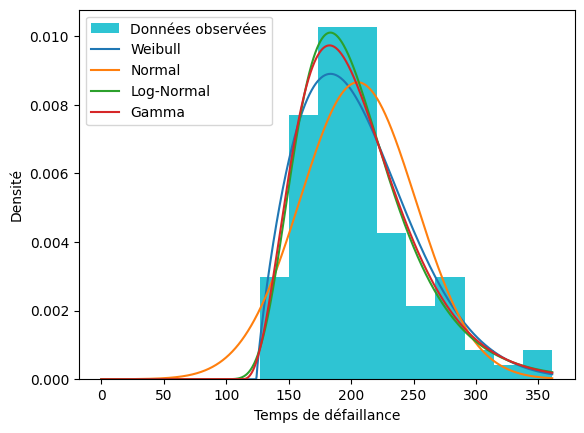

In [55]:
# Tracer l'histogramme des données de défaillance
plt.hist(failure_time, bins=10, density=True, alpha=0.9, color='#17becf', label='Données observées')

# Tracer les fonctions de densités (pdf) ajustées pour chaque distribution
x = np.linspace(0, max(failure_time), 1000)  # Créer un ensemble de points x pour le traçage

for name, dist in distributions.items():
    params = fitted_params[name]
    if name == "Weibull":
        pdf = weibull_min.pdf(x, params[0], loc=params[1], scale=params[2])
    elif name == "Normal":
        pdf = norm.pdf(x, loc=params[0], scale=params[1])
    elif name == "Log-Normal":
        pdf = lognorm.pdf(x, params[0], loc=params[1], scale=params[2])
    elif name == "Gamma":
        pdf = gamma.pdf(x, params[0], loc=params[1], scale=params[2])
    plt.plot(x, pdf, label=f'{name}')

# Ajouter des labels et une légende
plt.xlabel('Temps de défaillance')
plt.ylabel('Densité')
plt.legend()

# Afficher le graphique
plt.show()

#### Appliquer des tests statistiques pour comparer les distributions théoriques aux données

Après avoir ajusté plusieurs distributions statistiques aux temps de défaillance, nous allons évaluer leur adéquation en utilisant les tests suivants :



#### 1. Test de Kolmogorov-Smirnov (KS)

In [56]:
from scipy.stats import kstest

# Appliquer le test KS pour chaque distribution
ks_results = {}
for name, dist in distributions.items():
    params = fitted_params[name]
    cdf = lambda x: dist.cdf(x, *params[:-2], loc=params[-2], scale=params[-1])  # Fonction de distribution cumulative
    ks_stat, ks_p_value = kstest(failure_time, cdf)
    ks_results[name] = {"KS_stat": ks_stat, "p_value": ks_p_value}

# Afficher les résultats
ks_df = pd.DataFrame(ks_results).T.sort_values(by="KS_stat")
print("Résultats du test de Kolmogorov-Smirnov (KS):")
ks_df


Résultats du test de Kolmogorov-Smirnov (KS):


,KS_stat,p_value
Log-Normal,0.071910,0.652432
Gamma,0.078931,0.535430
Weibull,0.094090,0.318623
Normal,0.138333,0.039376


#### 2. test du Khi-deux:

In [57]:
from scipy.stats import chisquare

# Appliquer le test du Khi-deux pour chaque distribution
chi2_results = {}

for name, dist in distributions.items():
    params = fitted_params[name]  # Obtenir les paramètres ajustés pour la distribution
    cdf = lambda x: dist.cdf(x, *params[:-2], loc=params[-2], scale=params[-1])  # Fonction de distribution cumulative

    # Calcul des fréquences observées
    bins = 10  # Nombre de bins
    hist, bin_edges = np.histogram(failure_time, bins=bins)  # Fréquences observées absolues

    # Calcul des fréquences attendues à partir de la distribution théorique
    expected_probs = np.diff(cdf(bin_edges))  # Probabilités dans chaque bin
    expected_freq = len(failure_time) * expected_probs  # Fréquences attendues absolues

    # Vérification de la somme pour correspondance
    if not np.isclose(hist.sum(), expected_freq.sum(), rtol=1e-8):
        scaling_factor = hist.sum() / expected_freq.sum()
        expected_freq *= scaling_factor  # Ajustement des fréquences attendues

    # Effectuer le test du Khi-deux
    chi2_stat, chi2_p_value = chisquare(f_obs=hist, f_exp=expected_freq)
    chi2_results[name] = {"Chi2_stat": chi2_stat, "p_value": chi2_p_value}

# Afficher les résultats
chi2_df = pd.DataFrame(chi2_results).T.sort_values(by="Chi2_stat")
print("Résultats du test du Khi-deux:")
chi2_df


Résultats du test du Khi-deux:


,Chi2_stat,p_value
Log-Normal,7.036038,0.633367
Gamma,7.717748,0.562822
Weibull,10.394762,0.319482
Normal,29.389340,0.000557


##### les distributions Log-Normal, Gamma ou Weibull ont donné de meilleurs résultats que la Normal,

#### la comparaison des modèles en utilisant les critères AIC (Akaike Information Criterion) et BIC (Bayesian Information Criterion)

![AIC](images/aic.png)

![BIC](images/bic.png)

In [58]:
# Fonction pour calculer AIC et BIC
def calculate_aic_bic(model, data, params):
    """
    Calcule l'AIC et le BIC pour un modèle donné en utilisant les paramètres estimés.
    """
    n = len(data)  # Nombre d'observations
    log_likelihood = np.sum(model.logpdf(data, *params))  # Log-vraisemblance

    k = len(params)  # Nombre de paramètres estimés dans le modèle

    # Calcul de l'AIC et du BIC
    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    return aic, bic


In [59]:

# Calcul des AIC et BIC pour chaque modèle
aic_bic_results = {}
for name, dist in distributions.items():
    params = fitted_params[name]
    aic, bic = calculate_aic_bic(dist, failure_time, params)
    aic_bic_results[name] = {"AIC": aic, "BIC": bic}

pd.DataFrame(aic_bic_results)

,Weibull,Normal,Log-Normal,Gamma
AIC,1039.032455,1053.995642,1037.872591,1037.857388
BIC,1046.847966,1059.205982,1045.688101,1045.672899


Selon l'AIC et le BIC, les modèles Gamma et Log-Normal semblent être les plus adaptés pour nos données, car ils ont les valeurs les plus faibles dans les deux critères.
Le modèle Gamma a une légère préférence, étant donné qu'il a la plus faible valeur pour les deux critères (AIC et BIC), mais le modèle Log-Normal est très proche.

## 1) Log-Normal

#### Distribution Log-Normale : Relations Fondamentales

![fonction de densité](images/log_normal_f_t.png)



![fonction de repartition](images/log_normal_F(t).png)



![fonction de Fiabilité](images/log_normal_R.png)


![fonction de taux de defaillance](images/log_normal_taux.png)



![fonction de ](images/log_normal_H.png)

In [60]:
# Obtenir les paramètres ajustés pour la Log-Normal
log_normal_sigma, log_normal_loc, log_normal_scale = fitted_params["Log-Normal"]
log_normal_sigma

np.float64(0.35822708755745614)

#### Calcul des fonctions associées

In [61]:
# Points pour les calculs
x = np.linspace(0.1, max(failure_time), 1000)  # x > 0 pour la log-normale

# Calcul des relations fondamentales
pdf = lognorm.pdf(x, log_normal_sigma, log_normal_loc, log_normal_scale)        # Fonction de densité (PDF)
cdf = lognorm.cdf(x, log_normal_sigma, log_normal_loc, log_normal_scale)        # Fonction de répartition (CDF)
reliability = 1 - cdf                          # Fiabilité
failure_rate = pdf / reliability               # Taux de défaillance
hazard_cum = -np.log(reliability)              # Fonction de danger cumulée

# Résultats sous forme de dictionnaire (facultatif)
log_normal_results = {
    "x": x,
    "PDF": pdf,
    "CDF": cdf,
    "Reliability": reliability,
    "Failure Rate": failure_rate,
    "Cumulative Hazard": hazard_cum
}


#### Visualisation des courbes associées

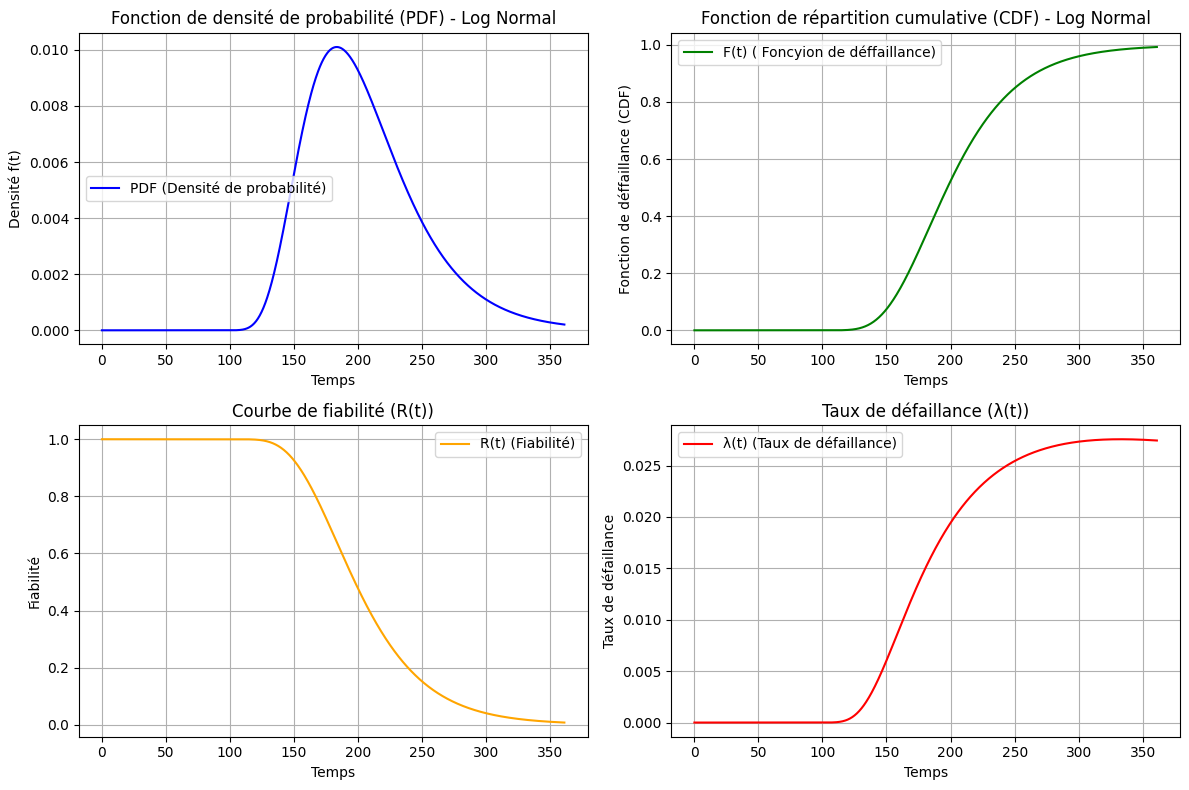

In [62]:

# Tracer les différentes fonctions
plt.figure(figsize=(12, 8))

#  Fonction de densité (PDF)
plt.subplot(2, 2, 1)
plt.plot(log_normal_results["x"], log_normal_results["PDF"], label='PDF (Densité de probabilité)', color='blue')
plt.xlabel('Temps')
plt.ylabel('Densité f(t)')
plt.title('Fonction de densité de probabilité (PDF) - Log Normal')
plt.grid()
plt.legend()

#  Fonction de répartition (CDF)
plt.subplot(2, 2, 2)
plt.plot(log_normal_results["x"], log_normal_results["CDF"], label='F(t) ( Foncyion de déffaillance)', color='green')
plt.xlabel('Temps')
plt.ylabel('Fonction de déffaillance (CDF)')
plt.title('Fonction de répartition cumulative (CDF) - Log Normal')
plt.grid()
plt.legend()

# Fiabilité
plt.subplot(2, 2, 3)
plt.plot(log_normal_results["x"], log_normal_results["Reliability"], label='R(t) (Fiabilité)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Fiabilité')
plt.title('Courbe de fiabilité (R(t))')
plt.grid()
plt.legend()

# Taux de défaillance
plt.subplot(2, 2, 4)
plt.plot(log_normal_results["x"], log_normal_results["Failure Rate"], label='λ(t) (Taux de défaillance)', color='red')
plt.xlabel('Temps')
plt.ylabel('Taux de défaillance')
plt.title('Taux de défaillance (λ(t))')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


#### Calcul de MTTF (Mean Time To Failure) pour la distribution Log-Normale

In [63]:
from scipy.integrate import quad


# Calcul de l'intégrale pour le MTTF : MTTF = ∫ R(t) dt
MTTF, _ = quad(lambda t: 1 - lognorm.cdf(t, log_normal_sigma, log_normal_loc, log_normal_scale), 0, 10000)
# Affichage du MTTF
print(f"MTTF (Log-Normale) : {MTTF:.2f}")

MTTF (Log-Normale) : 205.32


#### Calcul de la durée restante en fonction d'une probabilité donnée (par exemple, 95 % de fiabilité)

In [64]:
# Durée avant défaillance à une probabilité donnée (par exemple 95% de fiabilité)
probabilite_fiabilite = 0.95
# Inverser la fonction CDF pour obtenir le temps correspondant à 95% de fiabilité
temps_defaillance_estime = lognorm.ppf(1 - probabilite_fiabilite, log_normal_sigma, log_normal_loc, log_normal_scale)
print(f"Temps estimé avant défaillance pour une fiabilité de 95% : {temps_defaillance_estime:.2f} unités de temps")


Temps estimé avant défaillance pour une fiabilité de 95% : 145.19 unités de temps


#### temps de fin de fonctionnement réels et prédits par log-normal

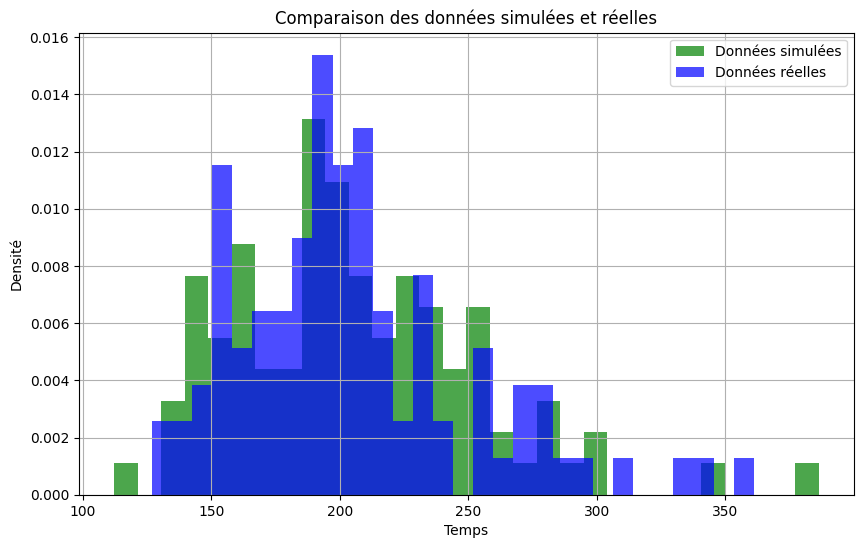

In [65]:
# Générer des échantillons aléatoires à partir de la distribution Log-Normale
n_samples = 100
simulated_data = lognorm.rvs(log_normal_sigma, log_normal_loc, log_normal_scale, size=n_samples)

# Comparer les échantillons simulés aux données réelles
plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=30, alpha=0.7, label='Données simulées', color='g', density=True)
plt.hist(failure_time, bins=30, alpha=0.7, label='Données réelles', color='b', density=True)
plt.xlabel('Temps')
plt.ylabel('Densité')
plt.title('Comparaison des données simulées et réelles')
plt.legend()
plt.grid(True)
plt.show()



#### Estime la durée de vie supplémentaire d'un moteur après un certain nombre de cycles réalisés,  en fonction d'une fiabilité conditionnelle donnée

In [66]:

def estimer_duree_supplementaire(cycles_realises, fiabilite_souhaitee):
    
    # Calculer la probabilité de survie à t0 cycles (P(T > t0))
    survival_at_t0 = 1 - lognorm.cdf(cycles_realises, log_normal_sigma, loc=log_normal_loc, scale=log_normal_scale)

    # Résoudre la probabilité conditionnelle : P(T > t0 + t | T > t0) = fiabilite_souhaitee
    # Ce qui revient à résoudre F(t0 + t) = 1 - R(t0) * fiabilite_souhaitee
    
    duree_totale = lognorm.ppf(1 - fiabilite_souhaitee * survival_at_t0, log_normal_sigma, loc=log_normal_loc, scale=log_normal_scale)
    
    # t_supp est le temps supplémentaire qu'il peut fonctionner avec la probabilité donnée (duree totale - cycles déjà réalisés)
    t_supp = duree_totale - cycles_realises

    return int(t_supp)


#### estimer la durée de vie restante de chaque moteur dans les données de test test_FD001 par Log normal

##### Extraire le nombre de cycles réalisés pour chaque moteur.

In [67]:
# DataFrame des cycles réalisés par moteur
test_cycles_realises = test_FD001.groupby('engine')['time'].max()


##### Estimation de la durée de vie restante

#### 1.  Trouver la meilleure fiabilité pour estmer la duée de vie restante 

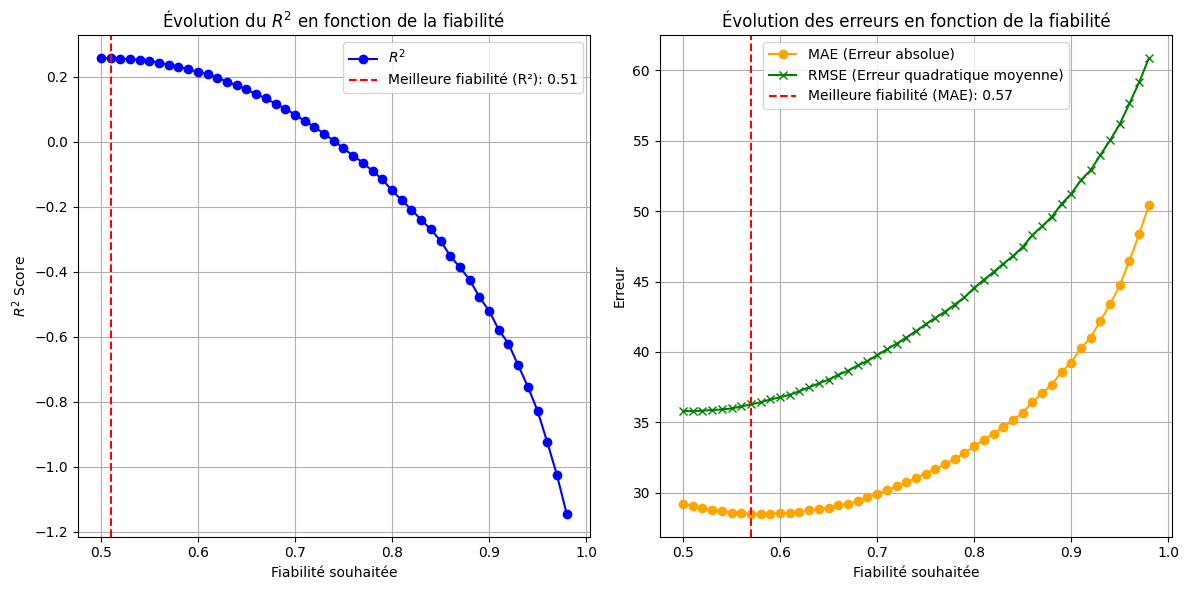

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Plage de fiabilités à tester
fiabilites = np.arange(0.5, 0.99, 0.01)

# Listes pour stocker les scores
r2_scores = []
mae_scores = []
rmse_scores = []

# Fonction pour évaluer les scores pour une fiabilité donnée
def evaluer_scores(fiabilite_souhaitee):
    duree_vie_restante = test_cycles_realises.apply(
        lambda x: estimer_duree_supplementaire( x, fiabilite_souhaitee=fiabilite_souhaitee)
    )
    # Calcul des métriques
    r2 = r2_score(rul_true.RUL, duree_vie_restante)
    mae = mean_absolute_error(rul_true.RUL, duree_vie_restante)
    rmse = np.sqrt(mean_squared_error(rul_true.RUL, duree_vie_restante))
    return r2, mae, rmse

# Calculer les scores pour chaque fiabilité
for fiabilite in fiabilites:
    r2, mae, rmse = evaluer_scores(fiabilite)
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Trouver la meilleure fiabilité (max R^2 et min MAE)
meilleure_fiabilite_r2 = fiabilites[np.argmax(r2_scores)]
meilleure_fiabilite_mae = fiabilites[np.argmin(mae_scores)]

# Visualisation des scores
plt.figure(figsize=(12, 6))

# \( R^2 \)
plt.subplot(1, 2, 1)
plt.plot(fiabilites, r2_scores, label='$R^2$', marker='o', color='blue')
plt.axvline(meilleure_fiabilite_r2, color='red', linestyle='--', label=f'Meilleure fiabilité (R²): {meilleure_fiabilite_r2:.2f}')
plt.title('Évolution du $R^2$ en fonction de la fiabilité')
plt.xlabel('Fiabilité souhaitée')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.grid()

# MAE et RMSE
plt.subplot(1, 2, 2)
plt.plot(fiabilites, mae_scores, label='MAE (Erreur absolue)', marker='o', color='orange')
plt.plot(fiabilites, rmse_scores, label='RMSE (Erreur quadratique moyenne)', marker='x', color='green')
plt.axvline(meilleure_fiabilite_mae, color='red', linestyle='--', label=f'Meilleure fiabilité (MAE): {meilleure_fiabilite_mae:.2f}')
plt.title('Évolution des erreurs en fonction de la fiabilité')
plt.xlabel('Fiabilité souhaitée')
plt.ylabel('Erreur')
plt.legend()
plt.grid()

# Afficher les graphes
plt.tight_layout()
plt.show()


#### 2. Estimation avec  fiabilité = 0.57

In [69]:
# Calculer la durée de vie restante pour chaque moteur
duree_vie_restante = test_cycles_realises.apply(
    lambda x: estimer_duree_supplementaire(x, fiabilite_souhaitee=0.57)
)

# Afficher les résultats sous forme de DataFrame
resultats = pd.DataFrame({
    'engine': test_cycles_realises.index,
    'cycles_realises': test_cycles_realises.values,
    'duree_vie_restante_estime': duree_vie_restante.values,
    'duree_vie_restante_reel':rul_true.RUL
})

resultats


,engine,cycles_realises,duree_vie_restante_estime,duree_vie_restante_reel
0,1,31,159,112
1,2,49,141,98
2,3,126,64,69
3,4,106,84,82
4,5,98,92,91
...,...,...,...,...
95,96,97,93,137
96,97,134,57,82
97,98,121,69,59
98,99,97,93,117


####  Results

Text(0, 0.5, 'True RUL')

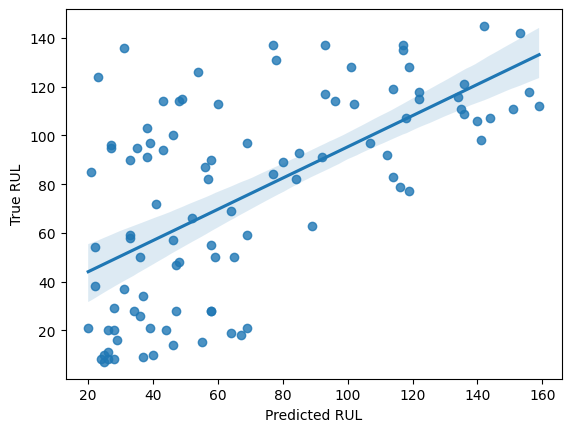

In [70]:
sns.regplot(x = resultats.duree_vie_restante_estime, y = resultats.duree_vie_restante_reel)
plt.xlabel('Predicted RUL')
plt.ylabel('True RUL')

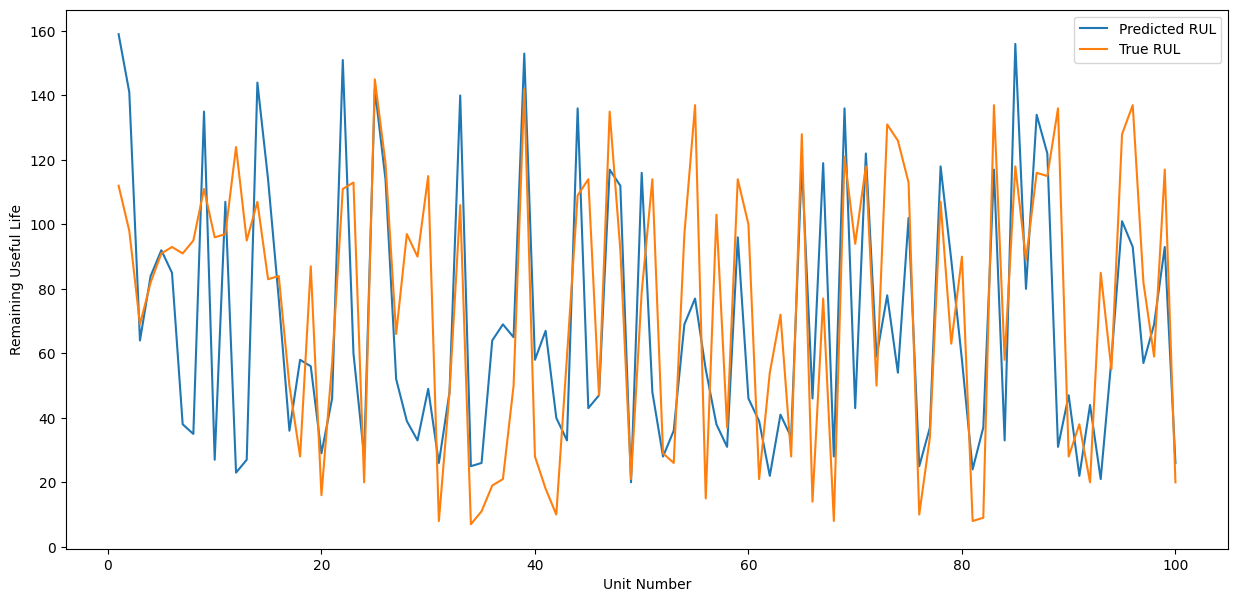

In [71]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(x = resultats.engine ,y = resultats.duree_vie_restante_estime , label = "Predicted RUL")
sns.lineplot(x = resultats.engine, y = resultats.duree_vie_restante_reel, label = "True RUL")
plt.xlabel("Unit Number")
plt.ylabel("Remaining Useful Life")
plt.legend(loc = 1)

#### Errors

In [72]:
mean_squared_error(resultats.duree_vie_restante_reel,resultats.duree_vie_restante_estime)

np.float64(1316.02)

In [73]:
mean_absolute_error(resultats.duree_vie_restante_reel, resultats.duree_vie_restante_estime)

np.float64(28.5)

In [74]:
r2_score(resultats.duree_vie_restante_reel, resultats.duree_vie_restante_estime)

0.2379158217852696

## 2.distribution Gamma 

![f(t)](images/gamma_f.png)

![F(t)](images/gamma_F_t.png)

![R(t)](images/gamma_R.png)

![lamda(t)](images/gamma_taux.png)

In [75]:
# Paramètres ajustés pour la distribution Gamma
gamma_alpha, gamma_loc, gamma_scale = fitted_params["Gamma"]  

#### calculer les fonctions

In [76]:
# Points pour les calculs
x = np.linspace(0.1, max(failure_time), 1000)  # x > 0 pour la Gamma

# Calcul des relations fondamentales
pdf = gamma.pdf(x, gamma_alpha, gamma_loc, gamma_scale)        # Fonction de densité (PDF)
cdf = gamma.cdf(x, gamma_alpha, gamma_loc, gamma_scale)        # Fonction de répartition (CDF)
reliability = 1 - cdf                         # Fiabilité
failure_rate = pdf / reliability              # Taux de défaillance
hazard_cum = -np.log(reliability)            # Fonction de danger cumulée

# Résultats sous forme de dictionnaire (facultatif)
results_gamma = {
    "x": x,
    "PDF": pdf,
    "CDF": cdf,
    "Reliability": reliability,
    "Failure Rate": failure_rate,
    "Cumulative Hazard": hazard_cum
}


#### visualiser les fonctions 

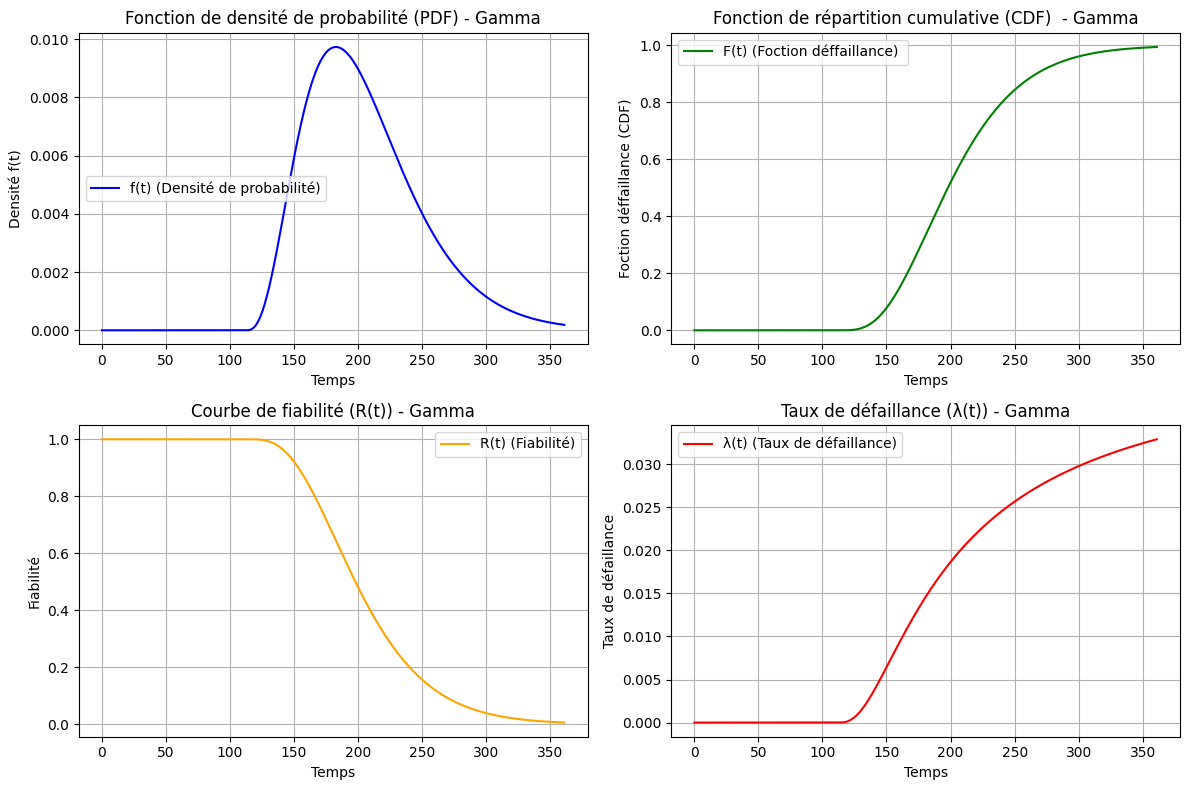

In [77]:
# Tracer les différentes fonctions pour la distribution Gamma
plt.figure(figsize=(12, 8))

#  Fonction de densité (PDF)
plt.subplot(2, 2, 1)
plt.plot(results_gamma["x"], results_gamma["PDF"], label='f(t) (Densité de probabilité)', color='blue')
plt.xlabel('Temps')
plt.ylabel('Densité f(t)')
plt.title('Fonction de densité de probabilité (PDF) - Gamma')
plt.grid()
plt.legend()

#  Fonction de répartition (CDF)
plt.subplot(2, 2, 2)
plt.plot(results_gamma["x"], results_gamma["CDF"], label='F(t) (Foction déffaillance) ', color='green')
plt.xlabel('Temps')
plt.ylabel('Foction déffaillance (CDF)')
plt.title('Fonction de répartition cumulative (CDF)  - Gamma')
plt.grid()
plt.legend()

# Fiabilité
plt.subplot(2, 2, 3)
plt.plot(results_gamma["x"], results_gamma["Reliability"], label='R(t) (Fiabilité)', color='orange')
plt.xlabel('Temps')
plt.ylabel('Fiabilité')
plt.title('Courbe de fiabilité (R(t)) - Gamma')
plt.grid()
plt.legend()

# Taux de défaillance
plt.subplot(2, 2, 4)
plt.plot(results_gamma["x"], results_gamma["Failure Rate"], label='λ(t) (Taux de défaillance)', color='red')
plt.xlabel('Temps')
plt.ylabel('Taux de défaillance')
plt.title('Taux de défaillance (λ(t)) - Gamma')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


#### Calcul de MTTF (Mean Time To Failure) pour la distribution Gamma

In [78]:
# Calcul de l'intégrale pour le MTTF : MTTF = ∫ R(t) dt
MTTF, _ = quad(lambda t: 1 - gamma.cdf(t, gamma_alpha, loc=gamma_loc, scale=gamma_scale), 0, 10000)
print(f"MTTF (Gamma) : {MTTF:.2f}")

MTTF (Gamma) : 205.31


#### Calcul de la durée restante en fonction d'une probabilité donnée (par exemple, 95 % de fiabilité)

In [79]:
# Temps estimé avant défaillance à une probabilité donnée
probabilite_fiabilite = 0.95
temps_defaillance_estime = gamma.ppf(1 - probabilite_fiabilite, gamma_alpha, loc=gamma_loc, scale=gamma_scale)
print(f"Temps estimé avant défaillance pour une fiabilité de 95% : {temps_defaillance_estime:.2f} unités de temps")


Temps estimé avant défaillance pour une fiabilité de 95% : 144.63 unités de temps


#### temps de fin de fonctionnement réels et prédits par Gamma

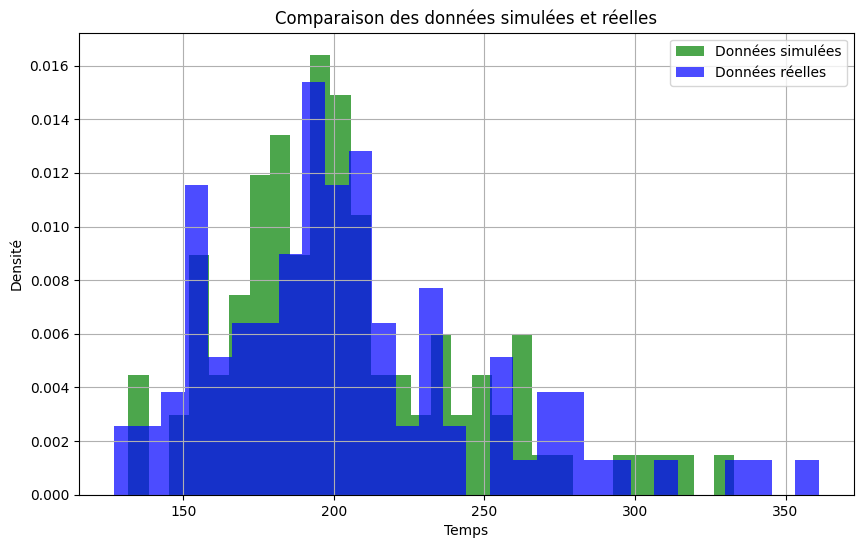

In [80]:

# Génération de données simulées à partir de la distribution Gamma
n_samples = 100
simulated_data = gamma.rvs(gamma_alpha, loc=gamma_loc, scale=gamma_scale, size=n_samples)

# Comparer les données simulées avec les données réelles
plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=30, alpha=0.7, label='Données simulées', color='g', density=True)
plt.hist(failure_time, bins=30, alpha=0.7, label='Données réelles', color='b', density=True)
plt.xlabel('Temps')
plt.ylabel('Densité')
plt.title('Comparaison des données simulées et réelles')
plt.legend()
plt.grid(True)
plt.show()

#### Estime la durée de vie supplémentaire d'un moteur après un certain nombre de cycles réalisés,  en fonction d'une fiabilité conditionnelle donnée

In [81]:
# Fonction pour estimer la durée de vie restante (RUL)
def estimer_duree_supplementaire(cycles_realises, fiabilite_souhaitee):
    survival_at_t0 = 1 - gamma.cdf(cycles_realises, gamma_alpha, loc=gamma_loc, scale=gamma_scale)
    duree_totale = gamma.ppf(1 - fiabilite_souhaitee * survival_at_t0, gamma_alpha, loc=gamma_loc, scale=gamma_scale)
    t_supp = duree_totale - cycles_realises
    return int(t_supp)

#### estimer la durée de vie restante de chaque moteur dans les données de test test_FD001 par Gamma

#### 1.  Trouver la meilleure fiabilité pour estmer la duée de vie restante 

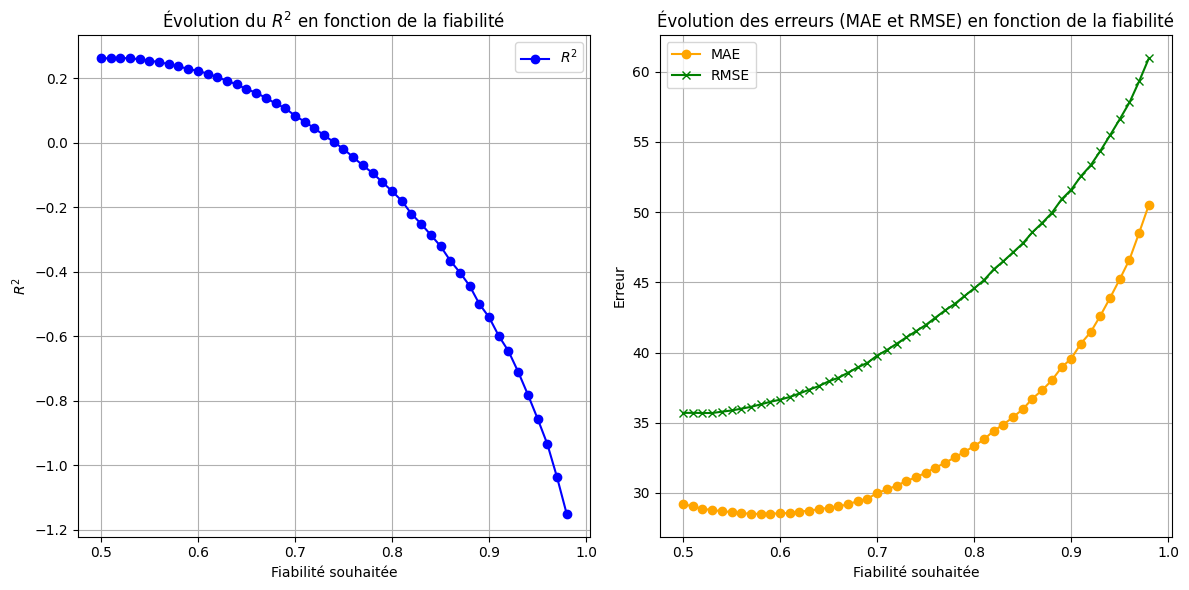

Meilleure fiabilité (R²) : 0.53
Meilleure fiabilité (MAE) : 0.57


In [82]:
# Plage de fiabilités à tester
fiabilites = np.arange(0.5, 0.99, 0.01)

# Calcul des scores R², MAE, RMSE pour différentes fiabilités
r2_scores, mae_scores, rmse_scores = [], [], []

for fiabilite in fiabilites:
    duree_vie_restante = test_cycles_realises.apply(
        lambda x: estimer_duree_supplementaire(x, fiabilite_souhaitee=fiabilite)
    )
    r2 = r2_score(rul_true.RUL, duree_vie_restante)
    mae = mean_absolute_error(rul_true.RUL, duree_vie_restante)
    rmse = np.sqrt(mean_squared_error(rul_true.RUL, duree_vie_restante))
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Visualisation des scores en fonction des fiabilités
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fiabilites, r2_scores, label='$R^2$', marker='o', color='blue')
plt.title('Évolution du $R^2$ en fonction de la fiabilité')
plt.xlabel('Fiabilité souhaitée')
plt.ylabel('$R^2$')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fiabilites, mae_scores, label='MAE', marker='o', color='orange')
plt.plot(fiabilites, rmse_scores, label='RMSE', marker='x', color='green')
plt.title('Évolution des erreurs (MAE et RMSE) en fonction de la fiabilité')
plt.xlabel('Fiabilité souhaitée')
plt.ylabel('Erreur')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Meilleure fiabilité (par R² et MAE)
meilleure_fiabilite_r2 = fiabilites[np.argmax(r2_scores)]
meilleure_fiabilite_mae = fiabilites[np.argmin(mae_scores)]
print(f"Meilleure fiabilité (R²) : {meilleure_fiabilite_r2:.2f}")
print(f"Meilleure fiabilité (MAE) : {meilleure_fiabilite_mae:.2f}")

#### 2. Estimation avec  fiabilité = 0.57

In [83]:
# Estimation pour la meilleure fiabilité
duree_vie_restante = test_cycles_realises.apply(
    lambda x: estimer_duree_supplementaire(x, fiabilite_souhaitee=meilleure_fiabilite_r2)
)

# Résultats
resultats = pd.DataFrame({
    'engine': test_cycles_realises.index,
    'cycles_realises': test_cycles_realises.values,
    'duree_vie_restante_estime': duree_vie_restante.values,
    'duree_vie_restante_reel': rul_true.RUL
})

resultats

,engine,cycles_realises,duree_vie_restante_estime,duree_vie_restante_reel
0,1,31,163,112
1,2,49,145,98
2,3,126,68,69
3,4,106,88,82
4,5,98,96,91
...,...,...,...,...
95,96,97,97,137
96,97,134,61,82
97,98,121,73,59
98,99,97,97,117


####  Results

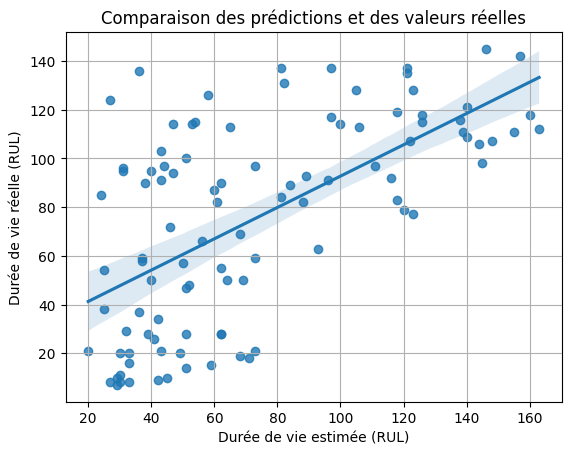

In [84]:
# Visualisation des résultats
sns.regplot(x=resultats.duree_vie_restante_estime, y=resultats.duree_vie_restante_reel)
plt.xlabel('Durée de vie estimée (RUL)')
plt.ylabel('Durée de vie réelle (RUL)')
plt.title('Comparaison des prédictions et des valeurs réelles')
plt.grid()
plt.show()



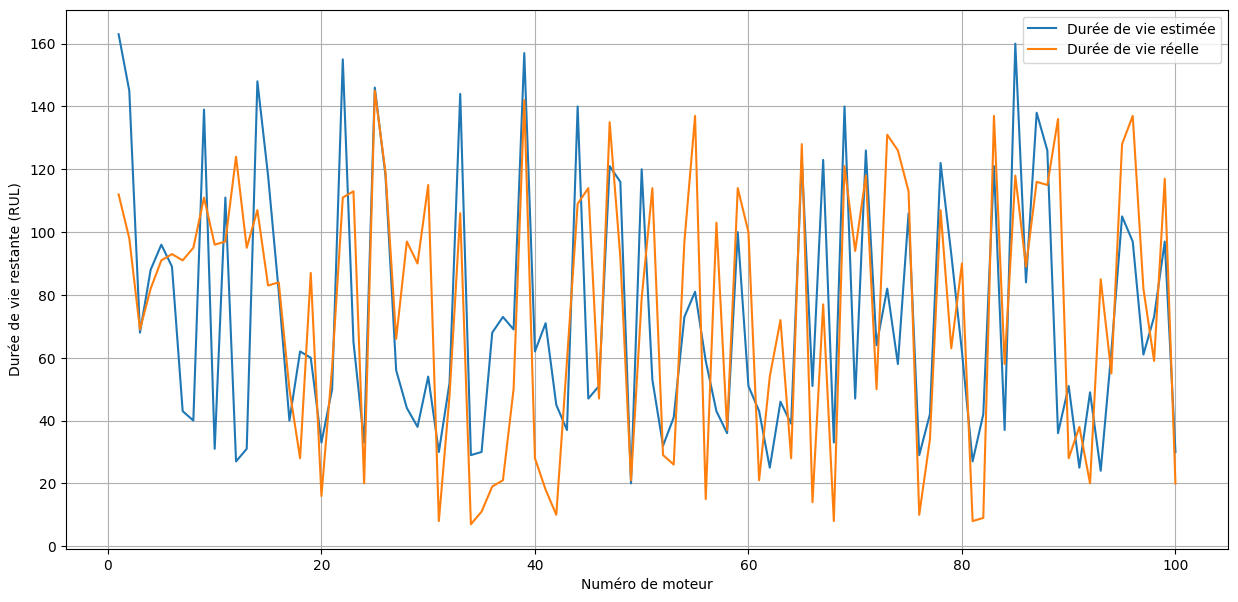

In [85]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(x=resultats.engine, y=resultats.duree_vie_restante_estime, label="Durée de vie estimée")
sns.lineplot(x=resultats.engine, y=resultats.duree_vie_restante_reel, label="Durée de vie réelle")
plt.xlabel("Numéro de moteur")
plt.ylabel("Durée de vie restante (RUL)")
plt.legend()
plt.grid()
plt.show()

#### Errors

In [86]:
mean_squared_error(resultats.duree_vie_restante_reel,resultats.duree_vie_restante_estime)

np.float64(1273.96)

In [87]:
mean_absolute_error(resultats.duree_vie_restante_reel, resultats.duree_vie_restante_estime)

np.float64(28.78)

In [88]:
r2_score(resultats.duree_vie_restante_reel, resultats.duree_vie_restante_estime)


0.26227203258427834